# Binary Classification via a Logistic Regression Model

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

### Determine the balance of outcomes and the baseline accuracy.

In [2]:

df = pd.read_csv('diabetes.csv')
df.head()

# print out a normilized table of the outcome
table_norm = df["Outcome"].value_counts(normalize=True)
print(table_norm)

# print out a baseline accuracy
a = df.Outcome[df['Outcome'] == 0].count()
b = df.Outcome[df['Outcome'] == 1].count()

baseline_accuracy = a/(a+b)
print(f'Baseline Accuracy is: {baseline_accuracy:.3f}')

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64
Baseline Accuracy is: 0.651


### Split out a training set and a test set

In [3]:
X = df.drop('Outcome', axis=1).values
y = df.Outcome.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

### Create a model of with a single insulin feature against binary diabetes outcome

In [13]:
LR = LogisticRegression(penalty=None, max_iter=1000)

x_train_insulin = Xtrain[:, 4].reshape(-1, 1)
y_test_indx = [i for i, _ in enumerate(ytest)]
x_test_insulin = Xtest[:, 4]

diabeteslr = LR.fit(x_train_insulin, ytrain)
print(f'Intercept: {diabeteslr.intercept_} \n Coefficients: {diabeteslr.coef_}')

Intercept: [-0.75122578] 
 Coefficients: [[0.00206725]]


### Evaluate and plot the model using the test set

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

<Axes: title={'center': 'Insulin vs Diabetes Outcome'}, xlabel='Insulin', ylabel='Diabetes Outcome'>

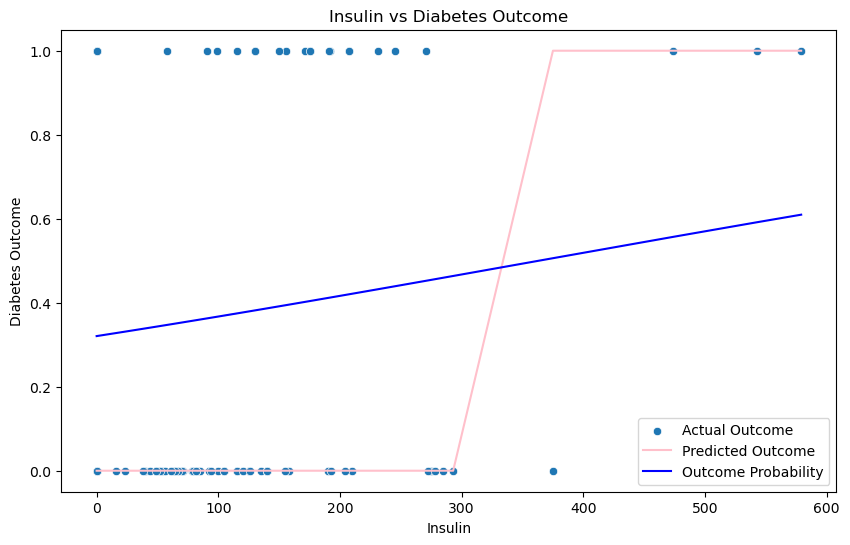

In [14]:
plt.figure(figsize=(10, 6))
plt.title('Insulin vs Diabetes Outcome')
plt.xlabel('Insulin')
plt.ylabel('Diabetes Outcome')
plt.legend(title='Legend')

# Actual values
sns.scatterplot(x=x_test_insulin, y=ytest, label='Actual Outcome')

ypred_insulin = diabeteslr.predict(x_test_insulin.reshape(-1, 1))
ytest_prob_insulin = diabeteslr.predict_proba(x_test_insulin.reshape(-1, 1))


# predicted values
sns.lineplot(x=x_test_insulin, y=ypred_insulin, color = 'pink', label='Predicted Outcome')

# probability of values. Anything above 0.5 is considered a 1
sns.lineplot(x=x_test_insulin, y=ytest_prob_insulin[:,1], color='blue', label='Outcome Probability')

In [17]:

# compute acurracy, precision, recall, sensitivity, and specificity
def compute_performance(yhat, y, classes):
    truepos = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    trueneg = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    falsepos = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    falseneg = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    acc = (truepos + trueneg) / (truepos + trueneg + falsepos + falseneg)
    precision = truepos / (truepos + falsepos)
    recall = truepos / (truepos + falseneg)  
    sensitivity = recall
    specificity = trueneg / (falsepos + trueneg)

    print(f'Accuracy: {acc:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, Sensitivity: {sensitivity:.3f}, Specificity: {specificity:.3f}')


# LR = LogisticRegression(penalty=None, max_iter=1000)

diabetes_lr = LR.fit(Xtrain, ytrain)
print(f'Intercept: {diabetes_lr.intercept_} \n Coefficients: {diabetes_lr.coef_}')

ytest_prob_all = diabetes_lr.predict_proba(Xtest)
y_pred = diabetes_lr.predict(Xtest)

y_test_idx = [i for i, _ in enumerate(ytest)]

compute_performance(y_pred, ytest, diabetes_lr.classes_)


Intercept: [-8.19289701] 
 Coefficients: [[ 0.09145958  0.03393882 -0.0137493   0.00442832 -0.00141667  0.08793881
   0.89613898  0.01994835]]
Accuracy: 0.825, Precision: 0.763, Recall: 0.617, Sensitivity: 0.617, Specificity: 0.916


Adjust the thresholds to determine performance of the model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.792, Precision: 0.642, Recall: 0.723, Sensitivity: 0.723, Specificity: 0.822
Accuracy: 0.818, Precision: 0.788, Recall: 0.553, Sensitivity: 0.553, Specificity: 0.935


/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

<Axes: title={'center': 'Diabetes Outcome Full Model but Against Insulin X'}, xlabel='Insulin', ylabel='Diabetes Outcome'>

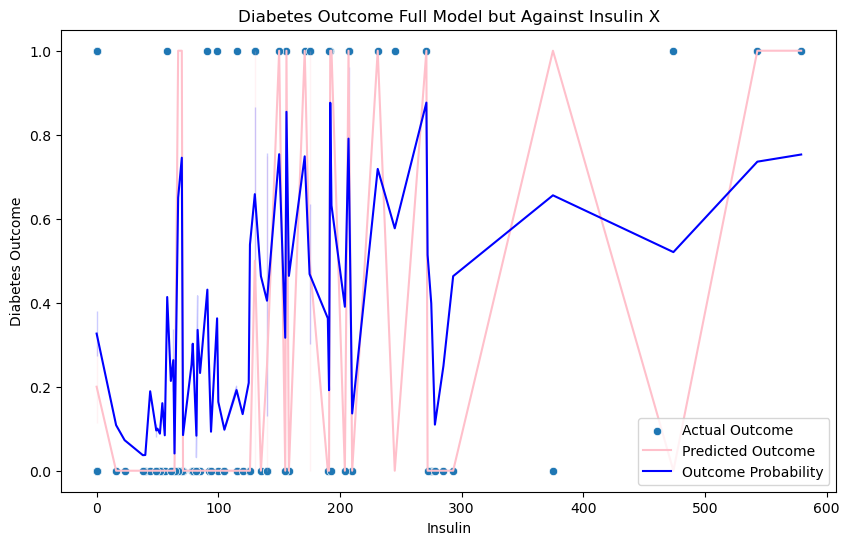

In [25]:
# .4 threshold
threshold = 0.4
y_pred_prob40 = diabetes_lr.predict_proba(Xtest)
y_pred_40 = diabetes_lr.classes_[(y_pred_prob40.T[1] > threshold).astype(int)]
compute_performance(y_pred_40, ytest, diabetes_lr.classes_)


# .6 threshold
threshold = 0.6
y_pred_prob60 = diabetes_lr.predict_proba(Xtest)
y_pred_60 = diabetes_lr.classes_[(y_pred_prob60.T[1] > threshold).astype(int)]
compute_performance(y_pred_60, ytest, diabetes_lr.classes_)

plt.figure(figsize=(10, 6))
plt.title('Diabetes Outcome Full Model but Against Insulin X 60 Threshold')
plt.xlabel('Insulin')
plt.ylabel('Diabetes Outcome')
plt.legend(title='Legend')

# print out the test set
# Actual Values:
sns.scatterplot(x=x_test_insulin, y=ytest, label='Actual Outcome')

# Predicted Values
sns.lineplot(x=x_test_insulin, y=y_pred_60, color = 'pink', label='Predicted Outcome')

# Probability of Values. Anything above 0.5 is considered a 1
sns.lineplot(x=x_test_insulin, y=y_pred_prob60[:,1], color='blue', label='Outcome Probability')


## Logistic Regression with a penalty

In [28]:
LR_PEN = LogisticRegression(penalty='l2', C=0.01, max_iter=1000)


lr_pen = LR_PEN.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
y_pred_pen = lr_pen.predict(Xtest)
y_pred_pen_prob = lr_pen.predict_proba(Xtest)

# Evaluate the performance
# ****** your code here ******
compute_performance(y_pred_pen, ytest, lr_pen.classes_)

Accuracy: 0.812, Precision: 0.737, Recall: 0.596, Sensitivity: 0.596, Specificity: 0.907


## Print out ROC curves and AUC scores

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/amyuccello/anaconda3/envs/ml-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

2.2 AUC: 0.536
3.1 AUC: 0.867
3.3 AUC: 0.853


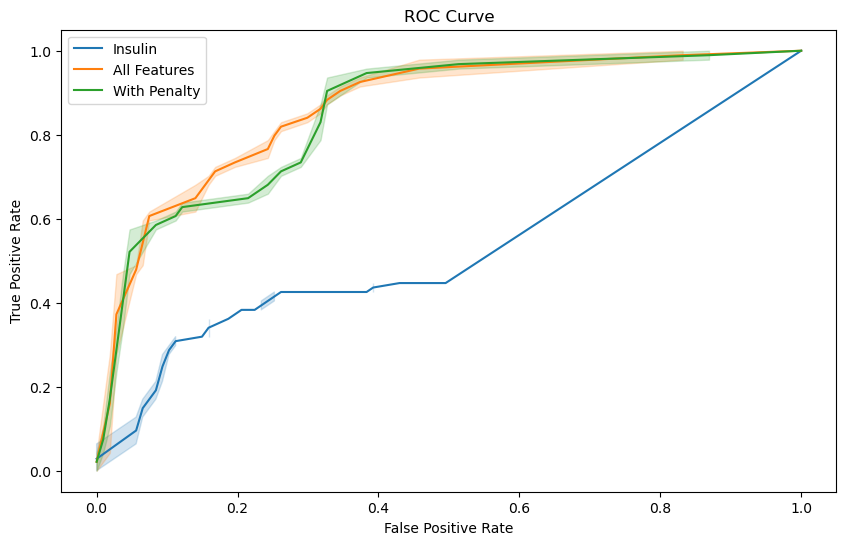

In [30]:
fpr01, tpr01, threshold01 = roc_curve(ytest, ytest_prob_insulin[:,1], pos_label=diabeteslr.classes_[1])
fpr02, tpr02, threshold02 = roc_curve(ytest, ytest_prob_all[:,1], pos_label=diabetes_lr.classes_[1])
fpr03, tpr03, threshold03 = roc_curve(ytest, y_pred_pen_prob[:,1], pos_label=lr_pen.classes_[1])


plt.figure(figsize=(10, 6))
plt.legend(title='Legend')

ax01 = sns.lineplot(x=fpr01, y=tpr01, label='Insulin')
ax02 = sns.lineplot(x=fpr02, y=tpr02, label='All Features')
ax03 = sns.lineplot(x=fpr03, y=tpr03, label='With Penalty')
ax01.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
ax01.set_title('ROC Curve')

print(f"2.2 AUC: {auc(fpr01,tpr01).round(3)}")
print(f"3.1 AUC: {auc(fpr02,tpr02).round(3)}")
print(f"3.3 AUC: {auc(fpr03,tpr03).round(3)}")